In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import linalg
from scipy import optimize
import scipy
import os
import spectrum_connectivity as sc
import spectrum_jacobia_new as sj
import tools
import importlib
importlib.reload(sc)
importlib.reload(tools)
import shutil
import dynamic


In [2]:
datapath = "data/test/"
figpath = "figure/test/"

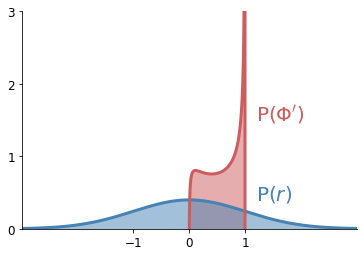

In [4]:
var = 1
def gau(x):
    return 1/(np.sqrt(2*np.pi*var))*np.exp(-1.0/(2*var)*x**2)
inputcurrent = np.sqrt(var)*np.random.randn(1000000)
phip_ = 1-np.tanh(inputcurrent)**2

xs = np.linspace(-3,3,num=1000)

ys = np.linspace(0.001,0.999,num=1000)
hy = np.arctanh((1.0-ys)**0.5)
hyp = 1.0/(2*ys*(1-ys)**0.5)
py = 2*gau(hy)*hyp
plt.plot(xs,gau(xs),linewidth=3,color="steelblue")
ys = np.concatenate([[0],ys,[1]])
py = np.concatenate([[0],py,[0]])
plt.plot(ys,py,linewidth=3,color="indianred")
aa = plt.hist(phip_,bins=100,density=True,color="indianred",alpha=0.5)
bb = plt.hist(inputcurrent,bins=100,density=True,color="steelblue",alpha=0.5)
plt.ylim(0,3)
plt.xlim(-3,3)
plt.text(s=r"P$(\Phi^\prime)$",x=1.2,y=1.5,color="indianred",fontsize=20)
plt.text(s=r"P$(r)$",x=1.2,y=0.4,color="steelblue",fontsize=20)
plt.xticks([-1,0,1],fontsize=12)
plt.yticks([0,1,2,3],fontsize=12)
ax =plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.savefig(figpath+"distribution_transformation1.pdf")

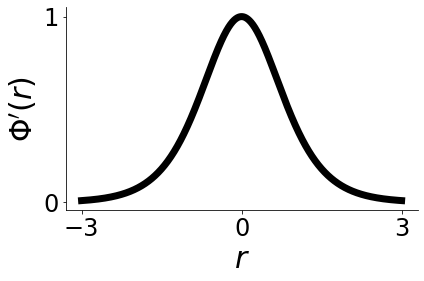

In [5]:
x = np.linspace(-3,3,num=1000)
plt.plot(x,1-np.tanh(x)**2,color="k",linewidth=7)
plt.xlabel(r"$r$",fontsize=30)
plt.ylabel(r"$\Phi^\prime(r)$",fontsize=30)
plt.yticks([0,1],fontsize=24)
plt.xticks([-3,0,3],fontsize=24)
ax =plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.tight_layout()
plt.savefig(figpath+"distribution_transformation2.pdf")

FAKE ALPHA = 0.01
c=0,d=1,gamma=1.5,tau=1,segment=1
{'N': 6000, 'alpha': 0.01, 'c': 0, 'd': 1, 'gamma': 1.5, 'tau': 0.01, 'phi': <function <lambda> at 0x000001749EBC8AF8>, 'diluted': 1, 'segment': 1, 'if_circulant': True, 'clean_diag': False, 'gaussian': False}


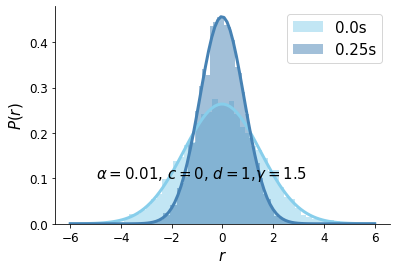

In [10]:
def gau(x,mean=0.0,var=1.0):
    return 1.0/(np.sqrt(2*np.pi*var))*np.exp(-(x-mean)**2/(2*var))
colors = ["skyblue","steelblue"]
N = 6000
alpha=0.01
c = 0
gamma =1.5
d = 1
diluted = 1
segment=1
tmax = 0.5
dt = 0.01
clean_diag=False
gaussian=False
print("FAKE ALPHA = "+str(alpha/(diluted)))
if_circulant = True
tau = 0.01
phi = lambda x: np.tanh(x)
all_overlap =[]
para = dynamic.modelpara(N=N,alpha=alpha,c=c,d=d,gamma=gamma,if_circulant=if_circulant,phi=phi,tau=tau,diluted=diluted,segment=segment,clean_diag=clean_diag,gaussian=gaussian)
mymodel = dynamic.rnn(para)
mymodel.simulate(tmax,1.5*np.random.randn(N),dt=dt)
state = mymodel.state
samples =2
for i in range(samples):
    steps = int(tmax/dt/samples)
    sample = steps*i
    plt.hist(state[:,sample],density=True,bins=50,label = str(round(sample/(tmax/dt)*tmax,2))+"s",color=colors[i],alpha=0.5)
    mean = np.mean(state[:,sample])
    var = np.var(state[:,sample])
    plt.plot(np.linspace(-6,6,num=100),gau(np.linspace(-6,6,num=100),mean,var),linewidth=3,alpha=1,color=colors[i])
plt.legend(fontsize=15)
plt.xlabel(r"$r$",fontsize=15)
plt.ylabel(r"$P(r)$",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.text(s=r"$\alpha=${}, $c=${}, $d=${},$\gamma=${}".format(alpha,c,d,gamma),x=-5,y=0.1,fontsize=15)
ax =plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.savefig(figpath+"distribution_transformation3.pdf")

In [6]:
para1 = [0.3,1,1,1]
para2 = [0.3,1,2,1]
para3 = [0.3,1,1,-1]
para4 = [0.3,1,2,-1]
para5 = [0.3,1,3,1]
para6 = [1.5,0,1,1]
para7 = [0.5,0,1,1]
para8 = [0.5,0,2,1]
paras = [para1,para2,para3,para4,para5,para6,para7,para8]
phip = lambda x: np.ones_like(x)-np.tanh(x)**2
variances = [0.5,1.0,2.0]

for para in paras:
    for variance in variances:
        var = variance
        alpha,c,d,gamma = para
        lbd = tools.eigen(100000,[alpha,c,d,gamma])
        print("alpha={},c={},d={},gamma={},var = {},activation is tanh".format(alpha,c,d,gamma,var))
        if  not os.path.exists(datapath+"xx_{}_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var,0)):
            xx = sj.draw_all(var,phip,lbd,alpha,lr=0.1,num=200,auto=False,step_len = 0.05)
            ww = sj.weight(para=para,if_ja=True,phip = phip,var = var)
            for s in range(len(xx)):
                 np.savetxt(datapath+"xx_{}_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var,s),xx[s])

            ww = np.array([ww.real,ww.imag])
            np.savetxt(datapath+"ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var),ww)
           

alpha=0.3,c=1,d=1,gamma=1,var = 0.5,activation is tanh
alpha=0.3,c=1,d=1,gamma=1,var = 1.0,activation is tanh
alpha=0.3,c=1,d=1,gamma=1,var = 2.0,activation is tanh
alpha=0.3,c=1,d=2,gamma=1,var = 0.5,activation is tanh
alpha=0.3,c=1,d=2,gamma=1,var = 1.0,activation is tanh
alpha=0.3,c=1,d=2,gamma=1,var = 2.0,activation is tanh
alpha=0.3,c=1,d=1,gamma=-1,var = 0.5,activation is tanh
alpha=0.3,c=1,d=1,gamma=-1,var = 1.0,activation is tanh
alpha=0.3,c=1,d=1,gamma=-1,var = 2.0,activation is tanh
alpha=0.3,c=1,d=2,gamma=-1,var = 0.5,activation is tanh
alpha=0.3,c=1,d=2,gamma=-1,var = 1.0,activation is tanh
alpha=0.3,c=1,d=2,gamma=-1,var = 2.0,activation is tanh
alpha=0.3,c=1,d=3,gamma=1,var = 0.5,activation is tanh
alpha=0.3,c=1,d=3,gamma=1,var = 1.0,activation is tanh
alpha=0.3,c=1,d=3,gamma=1,var = 2.0,activation is tanh
alpha=1.5,c=0,d=1,gamma=1,var = 0.5,activation is tanh
alpha=1.5,c=0,d=1,gamma=1,var = 1.0,activation is tanh
alpha=1.5,c=0,d=1,gamma=1,var = 2.0,activation is tanh
alph

0.5
1.0
2.0


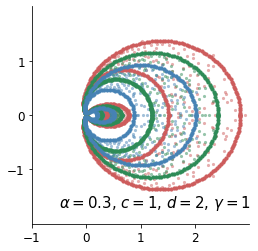

0.5
1.0
2.0


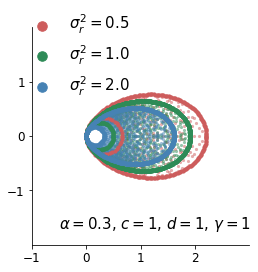

0.5
1.0
2.0


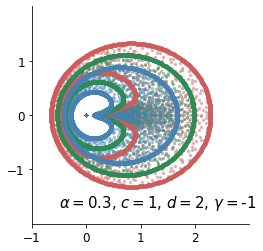

0.5
1.0
2.0


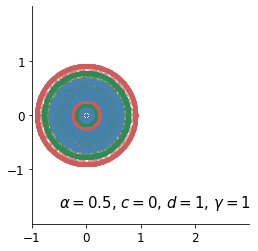

In [7]:
para2 = [0.3,1,2,1]
para5 = [0.3,1,1,1]
para4 = [0.3,1,2,-1]
para7 = [0.5,0,1,1]


paras = [para2,para5,para4,para7]
variances = [0.5,1.0,2.0]
colors = ["indianred","seagreen","steelblue"]
    
    
for paraindex,para in enumerate(paras):
    plt.clf()
    for i,variance in enumerate(variances):
        var = variance
        alpha,c,d,gamma = para
        
        w = np.loadtxt(datapath+"ww_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var))
        plt.scatter(w[0],w[1],s=10,alpha=0.5,color=colors[i],linewidth=0)
    for i,variance in enumerate(variances):
        var = variance
        print(var)
        alpha,c,d,gamma = para
        for s in range(4):
            if os.path.exists(datapath+"xx_{}_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var,s)):
                a=np.loadtxt(datapath+"xx_{}_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var,s))
                b=a.T
                x,y = tools.curve_sorting(b[0],b[1],interpolate=False,sorting=False)
                if s==0:
                    plt.scatter(x,y,color=colors[i],label=r"$\sigma_r^2=${}".format(var),alpha=1,s=10)
                else:
                    plt.scatter(x,y,color=colors[i],s=10,alpha=1)

    plt.text(s=r"$\alpha = ${}, $c = ${}, $d=${}, $\gamma=${}".format(alpha,c,d,gamma),x=-0.5,y=-1.7,fontsize=15)
    plt.ylim(-2,2)
    plt.xlim(-1,3)
    if paraindex==1:
        legend=plt.legend(fontsize=15,frameon=False,markerscale=3,loc=(-0.05,0.65))
#     plt.legend(fontsize=13)    
    plt.xticks([-1,0,1,2],fontsize=12)
    plt.yticks([-1,0,1],fontsize=12)
    ax = plt.gca()
    ax.set_aspect(1)
    ax =plt.gca()
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    plt.savefig(figpath+"jacobi{}.png".format(paraindex+1),dpi=300)
    plt.show()

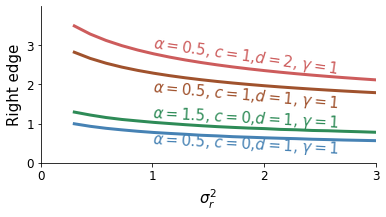

In [9]:
para1 = [0.5,1,1,1]
para2 = [0.5,1,2,1]
paras =[para1,para2]
all_var = np.linspace(0.3,3,num=20)
for para in paras:
    alpha,c,d,gamma = para
    if not os.path.exists(datapath+"max_eigen_{}_{}_{}_{}.csv".format(alpha,c,d,gamma)):
        all_boundary = []
        for var in all_var:
            lbd = tools.eigen(100000,[alpha,c,d,gamma])
            roots = sj.draw_all(var,phip,lbd,alpha,lr=0.1,num=200,auto=False,step_len = 0.05,scannum=30,onlyinitpoint=True)
            all_boundary.append(np.max(roots))
        np.savetxt(datapath+"max_eigen_{}_{}_{}_{}.csv".format(alpha,c,d,gamma),np.array(all_boundary))
alpha,c,d,gamma=[0.5,0,1,1]
para = [alpha,c,d,gamma]
N=100000
phip = lambda x: np.ones_like(x)-np.tanh(x)**2
max3 = []
for var in np.linspace(0.3,3,num=20):
    activation = np.sqrt(var)*np.random.randn(N)
    phips = phip(activation)
    rmax = gamma*np.sqrt(alpha*np.average(phips**2)+np.average(phips)**2)
    max3.append(rmax)
alpha,c,d,gamma=[1.5,0,1,1]
para = [alpha,c,d,gamma]
N=100000
phip = lambda x: np.ones_like(x)-np.tanh(x)**2
max4 = []
for var in np.linspace(0.3,3,num=20):
    activation = np.sqrt(var)*np.random.randn(N)
    phips = phip(activation)
    rmax = gamma*np.sqrt(alpha*np.average(phips**2)+np.average(phips)**2)
    max4.append(rmax)
colors = ["indianred","sienna","steelblue","seagreen"]
all_var = np.linspace(0.3,3,num=20)
alpha,c,d,gamma = [0.5,1,2,1]
max1 = np.loadtxt(datapath+"max_eigen_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
plt.plot(all_var,max1,linewidth=3,color=colors[0])
plt.text(s=r"$\alpha=${}, $c=${},$d={}$, $\gamma=${}".format(alpha,c,d,gamma),x=1.0,y=2.3,rotation=-8,fontsize=15,color=colors[0])
alpha,c,d,gamma = [0.5,1,1,1]
max2 = np.loadtxt(datapath+"max_eigen_{}_{}_{}_{}.csv".format(alpha,c,d,gamma))
plt.plot(all_var,max2,linewidth=3,color=colors[1])
plt.text(s=r"$\alpha=${}, $c=${},$d={}$, $\gamma=${}".format(alpha,c,d,gamma),x=1.0,y=1.4,rotation=-5,fontsize=15,color=colors[1])

alpha,c,d,gamma = [0.5,0,1,1]
plt.plot(all_var,max3,linewidth=3,color=colors[2])
plt.text(s=r"$\alpha=${}, $c=${},$d={}$, $\gamma=${}".format(alpha,c,d,gamma),x=1.0,y=0.24,rotation=-3,fontsize=15,color=colors[2])
alpha,c,d,gamma = [1.5,0,1,1]
plt.plot(all_var,max4,linewidth=3,color=colors[3])
plt.text(s=r"$\alpha=${}, $c=${},$d={}$, $\gamma=${}".format(alpha,c,d,gamma),x=1.0,y=0.9,rotation=-3,fontsize=15,color=colors[3])
plt.ylim(0,4)
plt.xlim(0.0,3)
plt.xlabel(r"$\sigma_r^2$",fontsize=15)
plt.ylabel("Right edge",fontsize=15)
plt.xticks([0,1,2,3],fontsize=12)
plt.yticks([0,1,2,3],fontsize=12)

ax = plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.set_aspect(0.35)
plt.savefig(figpath+"jacobi_rightedge.pdf")

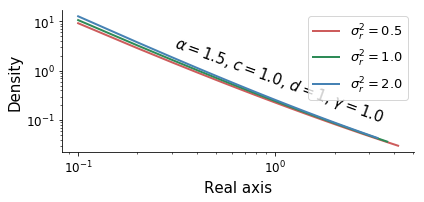

In [3]:
all_var=[0.5,1,2]
for var in all_var:
    phip = lambda x: np.ones_like(x)-np.tanh(x)**2
    alpha=1.5
    c=1.0
    d=1
    gamma=1
    para = [alpha,c,d,gamma]
    lbd = tools.eigen(100000,[alpha,c,d,gamma])
    start = 2.0
    step = 0.1
    if not os.path.exists(datapath+"density_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var)):

        pp=[]
        dd=[]
        for i in range(100):
            if i==0:
                x0 = [-1.59628593e+00+0.j ,1.33249758e-03+0.j, -2.55606219e+00+0.j]
            else:
                x0 =y
            where = start+i*step+0j
            den,y=sj.density(x0,where,var,phip,lbd,alpha,if_print=False,lr=0.2)
            pp.append(np.real(where))
            dd.append(den)
            print("where={},density={},hatuv={}".format(where,den,y[2]))
            if np.abs(y[2])<3e-1 or np.isnan(y[2]):
                break
        for i in range(100):
            if i==0:
                x0 = [-1.59628593e+00+0.j ,1.33249758e-03+0.j, -2.55606219e+00+0.j]
            else:
                x0 =y
            where = start-i*step+0j
            den,y=sj.density(x0,where,var,phip,lbd,alpha,if_print=False,lr=0.2)
            pp.append(np.real(where))
            dd.append(den)
            print("where={},density={},hatuv={}".format(where,den,y[2]))
            if np.abs(y[2])<3e-1 or np.isnan(y[2]):
                break
        pp = np.array(pp)
        dd = np.array(dd)
        order = np.argsort(pp)
        pp = pp[order]
        dd = dd[order]
        np.savetxt(datapath+"density_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var),dd)
        np.savetxt(datapath+"position_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var),pp)

        
paras = [[1.5,1.0,1,1,0.5],[1.5,1.0,1,1,1],[1.5,1.0,1,1,2]]
colors = ["indianred","seagreen","steelblue"]
fig, ax = plt.subplots()
for i,para in enumerate(paras):
    alpha,c,d,gamma,var = para
    dd = np.loadtxt(datapath+"density_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var))
    pp = np.loadtxt(datapath+"position_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var))
    ax.loglog(pp,dd,color=colors[i],linewidth=2,label=r"$\sigma_r^2=${}".format(var+1.0-1.0))
ax.text(s=r"$\alpha=${}, $c=${}, $d=${}, $\gamma=${}".format(alpha,c,d,gamma+1.0-1.0),x=0.3,y=3,rotation=-20,fontsize=15)
ax.set_ylabel("Density",fontsize=15)
ax.set_xlabel("Real axis",fontsize=15)
# plt.legend(frameon=False,fontsize=15)
ax.tick_params(axis='x', labelsize= 12)
ax.tick_params(axis='y', labelsize= 12)
ax.legend(frameon=True,fontsize=13,loc="upper right")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.set_aspect(0.25)
fig.tight_layout()
fig.savefig(figpath+"jacobi_density.pdf")        

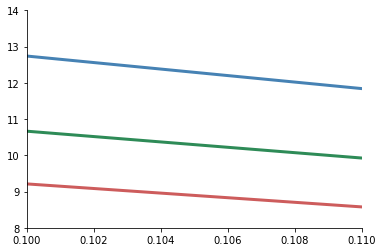

In [9]:
paras = [[1.5,1.0,1,1,0.5],[1.5,1.0,1,1,1],[1.5,1.0,1,1,2]]
colors = ["indianred","seagreen","steelblue"]
fig, ax = plt.subplots()
for i,para in enumerate(paras):
    alpha,c,d,gamma,var = para
    dd = np.loadtxt(datapath+"density_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var))
    pp = np.loadtxt(datapath+"position_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var))
    ax.plot(pp,dd,color=colors[i],linewidth=3,label="var={}".format(var))
# plt.ylabel("Density",fontsize=15)
# plt.xlabel("Real axis",fontsize=15)
# plt.legend(frameon=False,fontsize=15)
# ax.tick_params(axis='x', labelsize= 12)
# ax.tick_params(axis='y', labelsize= 12)
ax.set_xlim(0.1,0.11)
ax.set_ylim(8,14)

ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
fig.savefig(figpath+"jacobi_density2.pdf")



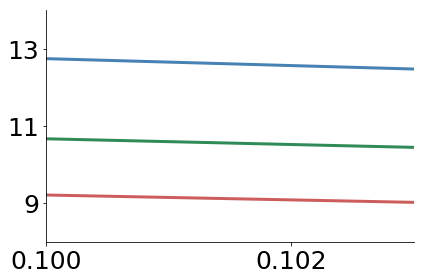

In [14]:
paras = [[1.5,1.0,1,1,0.5],[1.5,1.0,1,1,1],[1.5,1.0,1,1,2]]
colors = ["indianred","seagreen","steelblue"]
for i,para in enumerate(paras):
    alpha,c,d,gamma,var = para
    dd = np.loadtxt(datapath+"density_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var))
    pp = np.loadtxt(datapath+"position_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var))
    plt.plot(pp,dd,color=colors[i],linewidth=3,label="var={}".format(var))
# plt.ylabel("Density",fontsize=15)
# plt.xlabel("Real axis",fontsize=15)
# plt.legend(frameon=False,fontsize=15)
# ax.tick_params(axis='x', labelsize= 12)
# ax.tick_params(axis='y', labelsize= 12)
plt.xlim(0.1,0.103)
plt.ylim(8,14)
plt.xticks([0.1,0.102],fontsize=25)
plt.yticks([9,11,13],fontsize=25)
ax = plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
plt.tight_layout()
plt.savefig(figpath+"jacobi_density2.pdf")

C:\Users\psdz\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:448: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


(0.9087414840463894+6.49656996189481e-17j)
(0.9091751353723709-1.9292764744112677e-17j)
(0.908957253601228-0.0011362588241444788j)
(0.9089574065500691+0.0011362589213300257j)
where=(0.8+0j),density=0.14633234017400332,hatuv=(-0.33483853651177814+0j)
(0.8883136295401699+6.455090104661945e-16j)
(0.8887002386695808-1.3815241823123615e-17j)
(0.8885059986793339-0.0009872843432509677j)
(0.8885063501890302+0.0009872849274543956j)
where=(0.9+0j),density=0.1263658529599585,hatuv=(-0.2604067513323804+0j)
(0.9087414840463894+6.49656996189481e-17j)
(0.9091751353723709-1.9292764744112677e-17j)
(0.908957253601228-0.0011362588241444788j)
(0.9089574065500691+0.0011362589213300257j)
where=(0.8+0j),density=0.14633234017400332,hatuv=(-0.33483853651177814+0j)


C:\Users\psdz\Nutstore\1\非对称谱项目\source_code_new\code_github\spectrum_jacobia_new.py:405: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  gb = integrate.quad(lambda z: np.imag(func1(z)),-500,500)[0]


(0.9317227920416287-3.8680336238944615e-17j)
(0.9322113376442527+4.430058641880377e-17j)
(0.9319652169478723-0.00133145005708649j)
(0.9319657045518611+0.001331450987256899j)
where=(0.7000000000000001+0j),density=0.17302970829420009,hatuv=(-0.4006171078140114+0j)
(0.9576982534881386-3.278570826400891e-17j)
(0.9582514527773346-2.9280474354351916e-17j)
(0.9579724051842988-0.001596704019113815j)
(0.9579728785264585+0.0015967045600565693j)
where=(0.6000000000000001+0j),density=0.2101011796482873,hatuv=(-0.45703647263112473+0j)
(0.9870728541329354-1.0366377322065936e-16j)
(0.9876966058113833-7.365864636475839e-17j)
(0.9873814817745263-0.00197486381201876j)
(0.9873822140450279+0.001974864608332395j)
where=(0.5+0j),density=0.26467281954129324,hatuv=(-0.503132791715063+0j)
(1.019868103840655+1.1818188737137561e-17j)
(1.0205530743649818+4.2660027039161345e-17j)
(1.0202056096355778-0.0025506420006520137j)
(1.020206958497916+0.0025506444536564483j)
where=(0.4+0j),density=0.35143925525603026,hatuv=

C:\Users\psdz\Nutstore\1\非对称谱项目\source_code_new\code_github\spectrum_jacobia_new.py:389: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  gb = integrate.quad(lambda z: np.imag(func1(z)),-500,500)[0]


(1.0543182034007992+1.5763709602778225e-17j)
(1.0549845039472534-3.3150864885220274e-17j)
(1.0546425428064208-0.00351565016878174j)
(1.0546435898749402+0.00351565365920994j)
where=(0.30000000000000004+0j),density=0.5065108675264104,hatuv=(-0.5581062321355017+0j)
(1.08014258007217-5.910057398543889e-17j)
(1.0803518660769293+1.1922835177061913e-17j)
(1.080240368505769-0.005401475666135287j)
(1.0802385824437994+0.005401466735288895j)
where=(0.19999999999999996+0j),density=0.8430163904731434,hatuv=(-0.5613585552942175+0j)
(1.0312479187636954-7.459591203394749e-17j)
(1.0277087204980022-2.515414163612284e-16j)
(1.0294684914372745-0.010295271241481493j)
(1.0294601303711866+0.0102951876265918j)
where=(0.09999999999999998+0j),density=1.9201771039757727,hatuv=(-0.5408874195990985+0j)
(0.030731603952240498+6.202917119132837e-17j)
(-0.03084302976275541+2.3233742712400564e-16j)
(-5.5751355066801755e-05-0.030787738970399672j)
(-5.575134611725863e-05+0.030787730718771823j)
where=0j,density=9.79997384

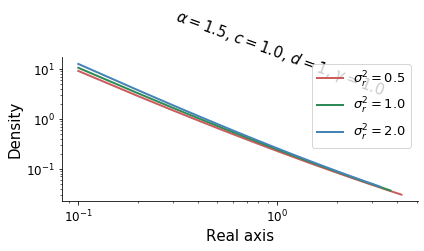

In [54]:
all_var=[0.5]
for var in all_var:
    phip = lambda x: np.ones_like(x)-np.tanh(x)**2
    alpha=1.5
    c=0
    d=1
    gamma=1
    para = [alpha,c,d,gamma]
    lbd = tools.eigen(100000,[alpha,c,d,gamma])
    start = 0.8
    step = 0.1
    if not os.path.exists(datapath+"density_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var)):

        pp=[]
        dd=[]
        for i in range(100):
            if i==0:
                x0 = [-1.59628593e+00+0.j ,1.33249758e-03+0.j, -2.55606219e+00+0.j]
            else:
                x0 =y
            where = start+i*step+0j
            den,y=sj.density(x0,where,var,phip,lbd,alpha,if_print=False,lr=0.2)
            pp.append(np.real(where))
            dd.append(den)
            print("where={},density={},hatuv={}".format(where,den,y[2]))
            if np.abs(y[2])<3e-1 or np.isnan(y[2]):
                break
        for i in range(100):
            if i==0:
                x0 = [-1.59628593e+00+0.j ,1.33249758e-03+0.j, -2.55606219e+00+0.j]
            else:
                x0 =y
            where = start-i*step+0j
            den,y=sj.density(x0,where,var,phip,lbd,alpha,if_print=False,lr=0.2)
            pp.append(np.real(where))
            dd.append(den)
            print("where={},density={},hatuv={}".format(where,den,y[2]))
            if np.abs(y[2])<3e-1 or np.isnan(y[2]):
                break
        pp = np.array(pp)
        dd = np.array(dd)
        order = np.argsort(pp)
        pp = pp[order]
        dd = dd[order]
        np.savetxt(datapath+"density_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var),dd)
        np.savetxt(datapath+"position_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var),pp)

        
paras = [[1.5,1.0,1,1,0.5],[1.5,1.0,1,1,1],[1.5,1.0,1,1,2]]
colors = ["indianred","seagreen","steelblue"]
fig, ax = plt.subplots()
for i,para in enumerate(paras):
    alpha,c,d,gamma,var = para
    dd = np.loadtxt(datapath+"density_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var))
    pp = np.loadtxt(datapath+"position_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var))
    ax.loglog(pp,dd,color=colors[i],linewidth=2,label=r"$\sigma_r^2=${}".format(var+1.0-1.0))
ax.text(s=r"$\alpha=${}, $c=${}, $d=${}, $\gamma=${}".format(alpha,c,d,gamma+1.0-1.0),x=0.3,y=3,rotation=-20,fontsize=15)
ax.set_ylabel("Density",fontsize=15)
ax.set_xlabel("Real axis",fontsize=15)
# plt.legend(frameon=False,fontsize=15)
ax.tick_params(axis='x', labelsize= 12)
ax.tick_params(axis='y', labelsize= 12)
ax.legend(frameon=True,fontsize=13,loc="upper right")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.set_aspect(0.25)
fig.tight_layout()
# fig.savefig(figpath+"jacobi_density.pdf")        

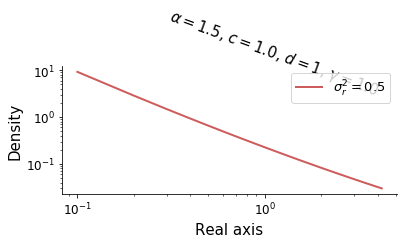

In [64]:
paras = [[1.5,1.0,1,1,0.5]]
colors = ["indianred","seagreen","steelblue"]
fig, ax = plt.subplots()
for i,para in enumerate(paras):
    alpha,c,d,gamma,var = para
    dd = np.loadtxt(datapath+"density_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var))
    pp = np.loadtxt(datapath+"position_{}_{}_{}_{}_{}.csv".format(alpha,c,d,gamma,var))
    ax.loglog(pp,dd,color=colors[i],linewidth=2,label=r"$\sigma_r^2=${}".format(var+1.0-1.0))
ax.text(s=r"$\alpha=${}, $c=${}, $d=${}, $\gamma=${}".format(alpha,c,d,gamma+1.0-1.0),x=0.3,y=3,rotation=-20,fontsize=15)
ax.set_ylabel("Density",fontsize=15)
ax.set_xlabel("Real axis",fontsize=15)
# plt.legend(frameon=False,fontsize=15)
ax.tick_params(axis='x', labelsize= 12)
ax.tick_params(axis='y', labelsize= 12)
ax.legend(frameon=True,fontsize=13,loc="upper right")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.set_aspect(0.25)
# fig.tight_layout()
# fig.savefig(figpath+"jacobi_density.pdf")        

In [12]:
def numerical_density(para,var,num_mat=30,dim_mat=3000):
    all_x = []
    all_y = []
    for i in range(num_mat):
        if i%10==0:
            print(str(i)+" has finished")
        x,y = tools.jacobi_weight(para=para,if_ja=True,N=dim_mat,var=var)
        all_x.append(x)
        all_y.append(y)
    all_x = np.reshape(np.array(all_x),-1)
    all_y = np.reshape(np.array(all_y),-1)
    a = plt.hist2d(all_x,all_y,bins=50,normed=True)
    return a

0 has finished
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
10 has finished
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
20 has finished
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c=1.0,d=1,gamma=1,tau=1,segment=1
c

C:\Users\psdz\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  if sys.path[0] == '':


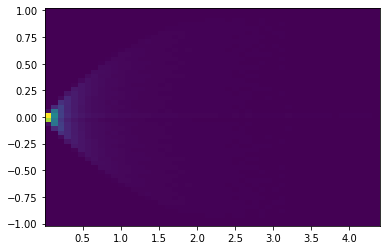

In [65]:
alpha=1.5
c=1.0
d=1
gamma=1
var = 0.5
para = [alpha,c,d,gamma]
a = numerical_density(para,var,num_mat=50,dim_mat=3000)

In [73]:
x[:].shape

(51,)

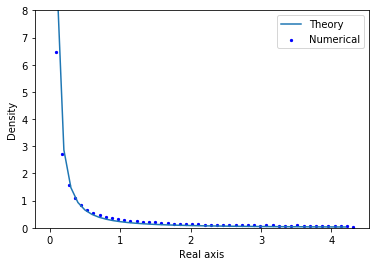

In [81]:
numerical=a[0]
x = a[1]
y=a[2]
for i in range(50):
    xx = x[i]
    yy = y[25]
    if i==0:
        plt.scatter(x[i],numerical[i,25],color="b",s=5,label="Numerical")
    else:
        plt.scatter(x[i],numerical[i,25],color="b",s=5)
plt.plot(pp,dd,label="Theory")
plt.ylim(0,8.0)
plt.xlabel("Real axis")
plt.ylabel("Density")
plt.legend()


(0, 3.0)

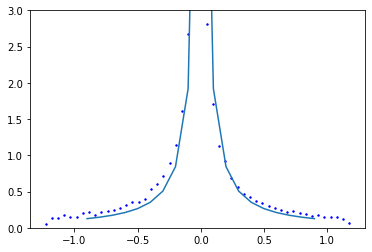

In [62]:
numerical=a[0]
x = a[1]
y=a[2]
for i in range(50):
    xx = x[i]
    yy = y[25]
    plt.scatter(x[i],numerical[i,25],color="b",s=2)
plt.plot(pp,dd)
plt.ylim(0,3.0)